Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0921 - val_loss: 0.0323
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0282 - val_loss: 0.0196
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0192 - val_loss: 0.0155
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0153 - val_loss: 0.0130
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0130 - val_loss: 0.0114
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0093 - val_loss: 0.0085
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0088 - val_loss: 0.0081
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0084
Reconstruction Loss: 0.008116896264255047
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s

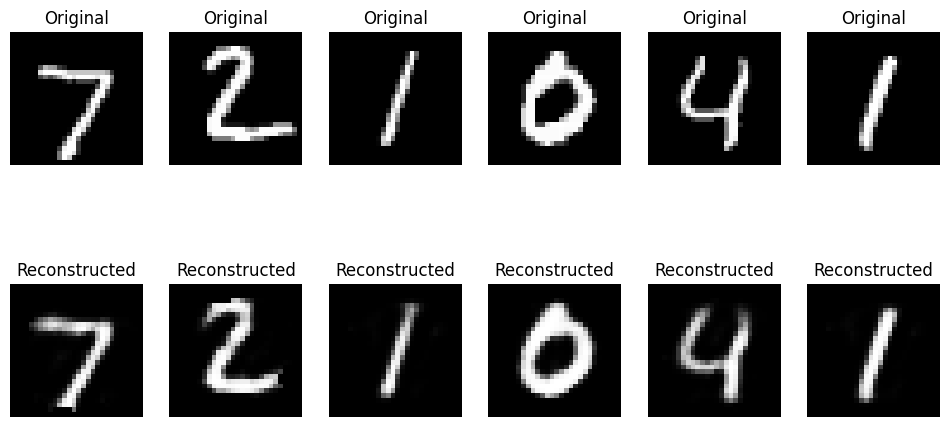

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape to add channel dimension (28, 28, 1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the Undercomplete Autoencoder model
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation='relu')(x)  # Compressing layer (undercomplete)
bottleneck = layers.Dense(64, activation='relu')(x)  # Bottleneck layer (reduced dimensionality)

# Decoder
x = layers.Dense(128, activation='relu')(bottleneck)
x = layers.Dense(28 * 28, activation='sigmoid')(x)
decoded_img = layers.Reshape((28, 28, 1))(x)

# Build the autoencoder model
autoencoder = models.Model(input_img, decoded_img)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Evaluate the reconstruction loss
reconstruction_loss = autoencoder.evaluate(x_test, x_test)
print(f'Reconstruction Loss: {reconstruction_loss}')

# Get the decoded (reconstructed) images
decoded_imgs = autoencoder.predict(x_test)

# Display the original and reconstructed images
n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()



